In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
# import matplotlib.image as mpimg
from PIL import Image

In [3]:
threshold_values = {}
h = [1]

In [4]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[int(round(img[i,j]))] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

In [24]:
def regenerate_img(img, thresholds):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= thresholds[2]:
                y[i,j] = 200
            elif img[i,j] >= thresholds[1]:
                y[i,j] = 150
            elif img[i,j] >= thresholds[0]:
                y[i,j] = 100
            else:
                y[i,j] = 0
    return y

In [6]:
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)

In [7]:
def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v

In [8]:
def threshold(h):
    cnt = countPixel(h)
    print(cnt)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w

In [9]:
def threshold_new(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        for j in range(i+1, len(h)):
            for k in range(j+1, len(h)):
                
                v1 = variance(0, i)
                w1 = wieght(0, i) / float(cnt)
#                 m1 = mean(0, i)
                
                v2 = variance(i, j)
                w2 = wieght(i, j) / float(cnt)
#                 m2 = mean(i, j)
                
                v3 = variance(j, k)
                w3 = wieght(j, k) / float(cnt)
#                 m3 = mean(j, k)
                
                v4 = variance(k, len(h))
                w4 = wieght(k, len(h)) / float(cnt)
#                 m4 = mean(k, len(h))
                
                V2w = w1 * (v1) + w2 * (v2) + w3 * (v3) + w4 * (v4)
#                 V2b = w1 * w2 * w3 * w4 * (m4 - m1)**2


                fw = open("trace.txt", "a")
                fw.write('T1='+ str(i) + "\n")
                fw.write('T2='+ str(j) + "\n")
                fw.write('T3='+ str(k) + "\n")
                
                

                
#                 fw.write('W1='+ str(w1) + "\n")
#                 fw.write('M1='+ str(m1) + "\n")
#                 fw.write('V1='+ str(v1) + "\n")
                
#                 fw.write('W2='+ str(w2) + "\n")
#                 fw.write('M2='+ str(m2) + "\n")
#                 fw.write('V2='+ str(v2) + "\n")
                
#                 fw.write('W3='+ str(w3) + "\n")
#                 fw.write('M3='+ str(m3) + "\n")
#                 fw.write('V3='+ str(v3) + "\n")

#                 fw.write('W4='+ str(w4) + "\n")
#                 fw.write('M4='+ str(m4) + "\n")
#                 fw.write('V4='+ str(v4) + "\n")
                

                fw.write('within class variance='+ str(V2w) + "\n")
#                 fw.write("\n")
                
                if not math.isnan(V2w):
                    threshold_values[(i,j,k)] = V2w
                
                
                
#         vb = variance(0, i)
#         wb = wieght(0, i) / float(cnt)
#         mb = mean(0, i)
        
#         vf = variance(i, len(h))
#         wf = wieght(i, len(h)) / float(cnt)
#         mf = mean(i, len(h))
        
#         V2w = wb * (vb) + wf * (vf)
#         V2b = wb * wf * (mb - mf)**2
        
#         fw = open("trace.txt", "a")
#         fw.write('T='+ str(i) + "\n")

#         fw.write('Wb='+ str(wb) + "\n")
#         fw.write('Mb='+ str(mb) + "\n")
#         fw.write('Vb='+ str(vb) + "\n")
        
#         fw.write('Wf='+ str(wf) + "\n")
#         fw.write('Mf='+ str(mf) + "\n")
#         fw.write('Vf='+ str(vf) + "\n")

#         fw.write('within class variance='+ str(V2w) + "\n")
#         fw.write('between class variance=' + str(V2b) + "\n")
#         fw.write("\n")
        
#         if not math.isnan(V2w):
#             threshold_values[i] = V2w

In [10]:
def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print('optimal threshold', optimal_threshold[0])
    return list(optimal_threshold[0])

In [11]:
def rgb2gray(rgb):
#     print(rgb)
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

(461, 690, 4)


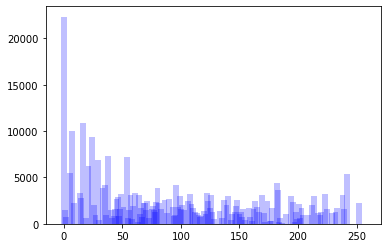

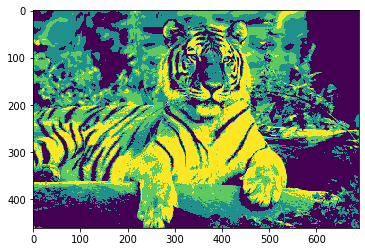

In [33]:

image1 = mpimg.imread('img/tiger1.bmp')
# plt.imshow(image1)
print(image1.shape)
gray = rgb2gray(image1)
# print(gray)
img = np.asarray(gray)

# print(img)
h = Hist(img)
plt.imshow(gray)
# threshold_new(h)
# op_thres = get_optimal_threshold()

res = regenerate_img(img, [45,105,175])
plt.imshow(res)
# plt.savefig("img/otsu.bmp")




# image = Image.open('img/data13.bmp').convert("L")
# img = np.asarray(image)


